In [1]:
import elephant.conversion as conv
import matplotlib.pyplot as plt
import neo
import numpy as np
import os
import pandas as pd
import pickle
import quantities as pq
import statistics

from elephant.signal_processing import hilbert
from elephant.statistics import cv, isi, mean_firing_rate, time_histogram

%matplotlib inline

## Parkinson's Disease

cfg.seeds = {'conn': 4321, 'stim': 1234, 'loc': 4321}

Nap = 0.0055

BK = 7.251280172010002e-05

NaT = 0.00086 

kap_BS.mod		sh=11	# sh settings close to the correct AP threshold

nax_BS.mod		sh=11

kdr_BS.mod 		sh=11

cfg.ihGbar = 0.75

mitoPark, quiet wakefulness

mitoPark; 6-18 weeks old (0.75 times weightLong)

cfg.dt = 0.025

### Load cortical column physiology

In [2]:
experimentID = 'sM1_09-14-2024_06'


In [3]:
set_of_neurons = 'all'


In [4]:
bin_size = 1 # 1ms bin size


In [18]:
data = pd.read_json(f'{experimentID}_data.json')


In [19]:
pd.set_option('display.max_rows', len(data))
data


,net,netParams_version,netpyne_changeset,netpyne_version,simConfig,simData
cells,"[{'conns': [], 'gid': 0, 'secLists': None, 'se...",56,,1.0.5,NaN,NaN
params,{'cellParams': {'CT6_reduced': {'conds': {'cel...,56,,1.0.5,NaN,NaN
pops,"{'CT6': {'cellGids': [8563, 8564, 8565, 8566, ...",56,,1.0.5,NaN,NaN
recXElectrode,"{'pos': [[150, 150, 150, 150, 150, 150, 150, 1...",56,,1.0.5,NaN,NaN
AMPATau2Factor,NaN,56,,1.0.5,1.0,NaN
EEGain,NaN,56,,1.0.5,0.5,NaN
EIGain,NaN,56,,1.0.5,1.0,NaN
EPVGain,NaN,56,,1.0.5,1.0,NaN
ESOMGain,NaN,56,,1.0.5,1.0,NaN
IClamp1,NaN,56,,1.0.5,"{'amp': 0.5, 'dur': 1000, 'loc': 0.5, 'pop': '...",NaN


In [20]:
pd.reset_option('display.max_rows')


### create a spikes dataframe

In [21]:
spikes = pd.DataFrame({'time': data['simData']['spkt'], 'id': data['simData']['spkid']})


In [22]:
spikes.id = spikes.id.astype(int)


### Raster Plot

In [23]:
spikes['pop'] = spikes.apply(lambda row: data['net']['cells'][int(row.id)]['tags']['pop'], axis=1)


In [24]:
def assign_pop_color(pop):
    color = 'black'
    if (pop == 'IT2'):
        color = 'saddlebrown'
    elif (pop == 'IT4'):
        color = 'sienna'
    elif (pop == 'IT5A'):
        color = 'brown'
    elif (pop == 'IT5B'):
        color = 'rosybrown'
    elif (pop == 'PT5B'):
        color = 'red'
    elif (pop == 'IT6'):
        color = 'tan'
    elif (pop == 'CT6'):
        color = 'darkgoldenrod'
    # inhibitory
    elif (pop == 'PV2'):
        color = 'orchid'
    elif (pop == 'SOM2'):
        color = 'darkorchid'
    elif (pop == 'PV5A'):
        color = 'crimson'
    elif (pop == 'SOM5A'):
        color = 'magenta'
    elif (pop == 'PV5B'):
        color = 'violet'
    elif (pop == 'SOM5B'):
        color = 'mediumorchid'
    elif (pop == 'PV6'):
        color = 'darkviolet'
    elif (pop == 'SOM6'):
        color = 'palevioletred'
    return color

def assign_unit_markersize(unit):
    markersize = 1
    return markersize

spikes['color'] = spikes.apply(lambda row: assign_pop_color(row['pop']), axis=1)
spikes['markersize'] = spikes.apply(lambda row: assign_unit_markersize(row.id), axis=1)


In [25]:
spikes.to_json(f'{experimentID}_spikes.json')


In [25]:
spikes = pd.read_json(f'{experimentID}_spikes.json')


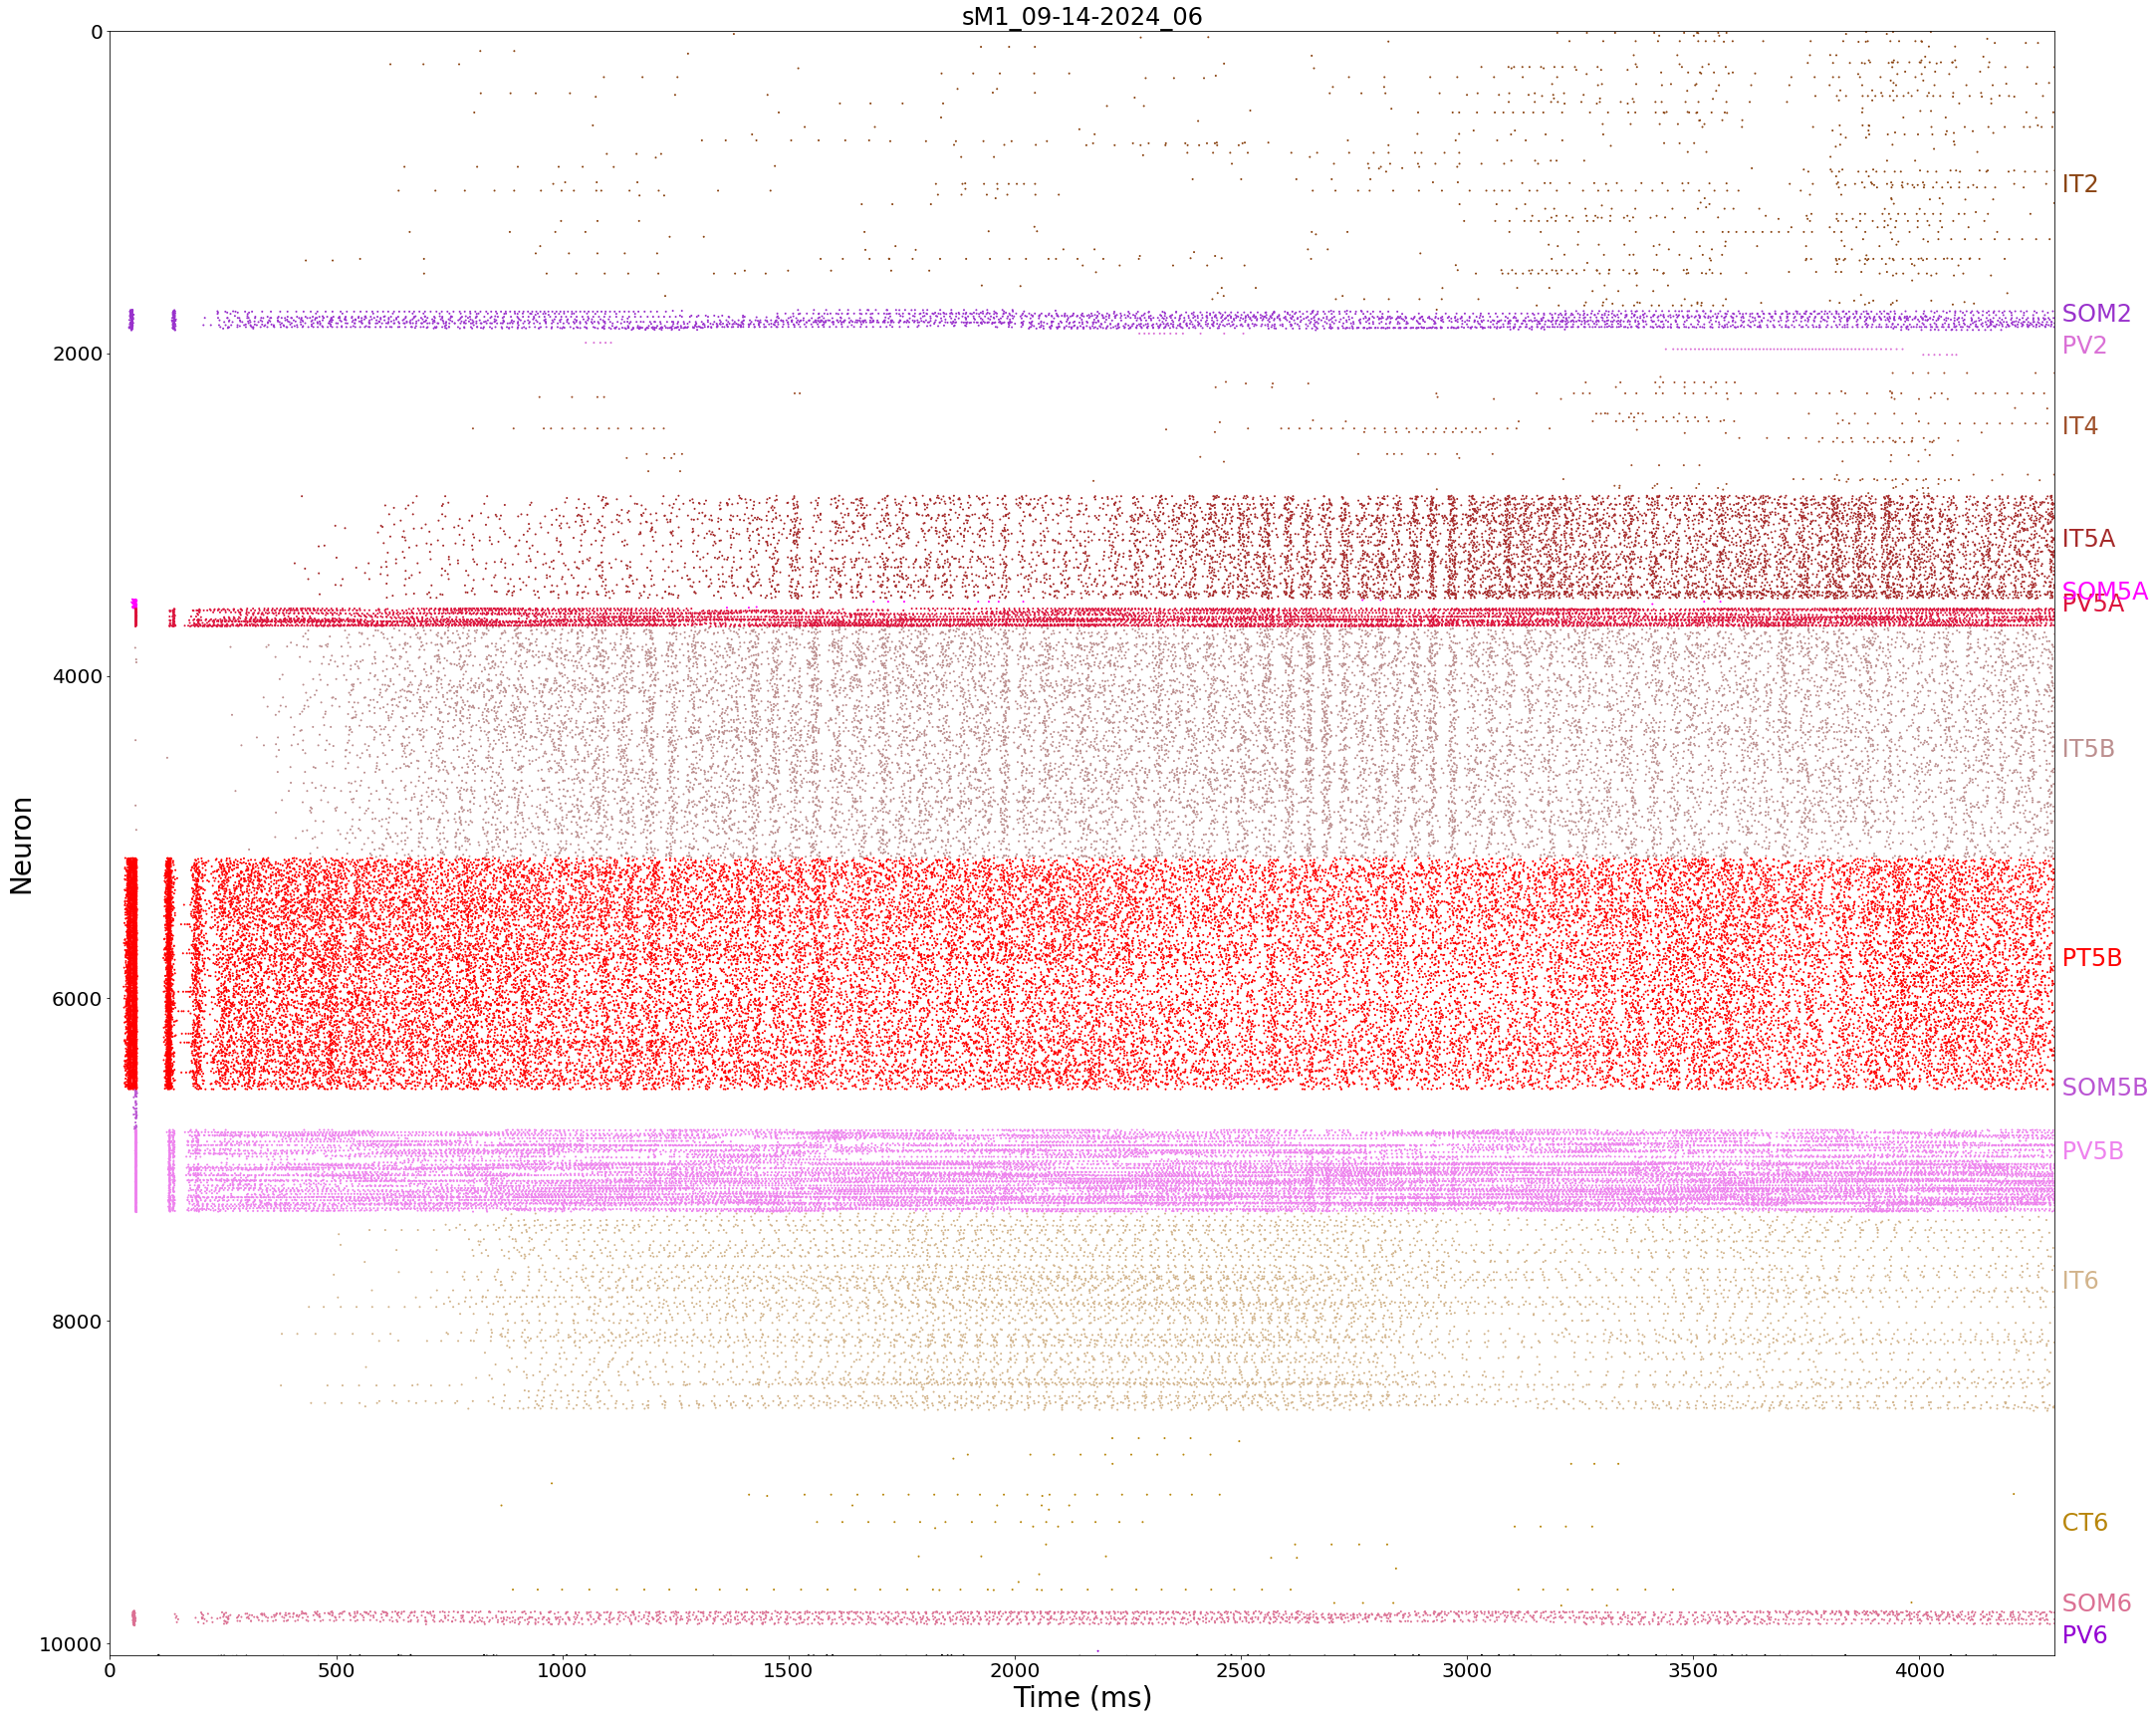

In [26]:
plt.figure(figsize=(35,30))
plt.ylim(0, 10073)
plt.gca().invert_yaxis()
ax = plt.gca()

xmin = 0
xmax = 4300
plt.xlim(xmin, xmax)

ann_font_size = 24

plt.annotate(' IT2', xy=(xmax, 1000), color = 'saddlebrown', fontsize=ann_font_size) 
plt.annotate(' IT4', xy=(xmax, 2500), color = 'sienna', fontsize=ann_font_size) 
plt.annotate(' IT5A', xy=(xmax, 3200), color = 'brown', fontsize=ann_font_size) 
plt.annotate(' IT5B', xy=(xmax, 4500), color = 'rosybrown', fontsize=ann_font_size) 
plt.annotate(' PT5B', xy=(xmax, 5800), color = 'red', fontsize=ann_font_size)
plt.annotate(' IT6', xy=(xmax, 7800), color = 'tan', fontsize=ann_font_size) 
plt.annotate(' CT6', xy=(xmax, 9300), color = 'darkgoldenrod', fontsize=ann_font_size)

plt.annotate(' PV2', xy=(xmax, 2000), color = 'orchid', fontsize=ann_font_size) 
plt.annotate(' SOM2', xy=(xmax, 1800), color = 'darkorchid', fontsize=ann_font_size) 
plt.annotate(' PV5A', xy=(xmax, 3600), color = 'crimson', fontsize=ann_font_size) 
plt.annotate(' SOM5A', xy=(xmax, 3525), color = 'magenta', fontsize=ann_font_size) 
plt.annotate(' PV5B', xy=(xmax, 7000), color = 'violet', fontsize=ann_font_size) 
plt.annotate(' SOM5B', xy=(xmax, 6600), color = 'mediumorchid', fontsize=ann_font_size) 
plt.annotate(' PV6', xy=(xmax, 10000), color = 'darkviolet', fontsize=ann_font_size) 
plt.annotate(' SOM6', xy=(xmax, 9800), color = 'palevioletred', fontsize=ann_font_size) 

plt.title('sM1_09-14-2024_06', fontsize= 24)
plt.xlabel('Time (ms)', fontsize=28)
plt.ylabel('Neuron', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.scatter(spikes.time, spikes.id, color=spikes.color, s=spikes.markersize)


In [27]:
len(data['net']['cells'])


17073

### Duration of Simulation

In [28]:
spikes.time.max()


4299.974999972589

## Neo and Elephant Frameworks

In [29]:
#%%time
block = neo.Block()
segment = neo.Segment(name=f'Segment 0')
block.segments.append(segment)
pops = spikes['pop'].unique()
for pop in pops:
    group = neo.Group(name=f'{pop}')
    block.groups.append(group)

signal = neo.AnalogSignal(pd.DataFrame(data['simData']['LFP']).mean(axis=1), units=pq.mV, sampling_rate=40 * pq.kHz, t_start=0.0*pq.ms, t_stop=4300.0*pq.ms)
block.segments[0].analogsignals.append(signal)

spike_ids = spikes.id.unique()
for ident in spike_ids:
    pop = spikes[spikes.id == ident]['pop'].unique()
    annotate_dict = {'neuron_pop': f'{pop[0]}'}
    spikeTrain = neo.SpikeTrain(spikes[spikes.id == ident].time, units=pq.ms, t_start=0.0*pq.ms, t_stop=4300.0*pq.ms, name=f'{ident}', **annotate_dict)
    block.segments[0].spiketrains.append(spikeTrain)
    for group in block.groups:
        if group.name == pop[0]:
            group.spiketrains.append(spikeTrain)


## add membrane potential traces to population groups

In [30]:
%%time
# only need to add traces
for neuron_id in range(5130, 5130 + 400):
    # data are grouped by neuron identifiers

    pop = spikes[spikes.id == neuron_id]['pop'].unique()
    membrane_potential_trace = neo.AnalogSignal(pd.DataFrame(data['simData']['V_soma'][f'cell_{neuron_id}']).mean(axis=1), units=pq.mV, sampling_rate=40 * pq.kHz, t_start=0.0*pq.ms, t_stop=4300.0*pq.ms, name=f'{neuron_id}')

    block.segments[0].analogsignals.append(membrane_potential_trace)
    for group in block.groups:
        if group.name == pop[0]:
            group.analogsignals.append(membrane_potential_trace)
        elif group.name == neuron_id:                                                                     
            group.analogsignals.append(membrane_potential_trace)


CPU times: user 5.52 s, sys: 158 ms, total: 5.68 s
Wall time: 5.69 s


In [31]:
%%time
# save full data set into one file
with neo.NixIO(f'data/{experimentID}.nix', mode='ow') as writer:
    writer.write_block(block)


CPU times: user 2min 35s, sys: 5.26 s, total: 2min 40s
Wall time: 2min 46s


In [5]:
%%time
# read block
with neo.NixIO(f'data/{experimentID}.nix', mode='ro') as reader:
    block = reader.read_block()


CPU times: user 1min 18s, sys: 2.47 s, total: 1min 20s
Wall time: 1min 24s


([], [])

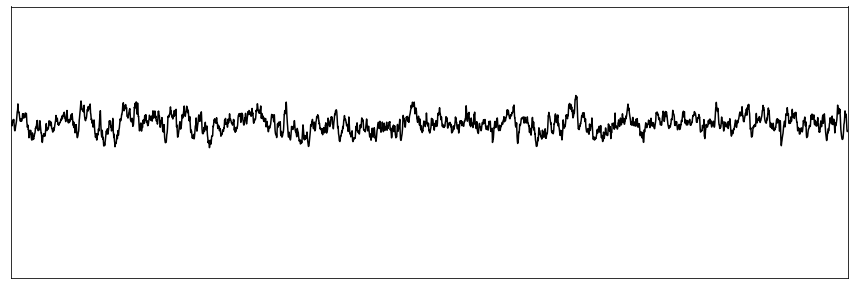

In [32]:
# 40 samples per ms
xmin = 2000 * 40
xmax = 2250 * 40
plt.figure(figsize=(15,5))
plt.xlim(xmin, xmax)
plt.ylim(-0.13, 0.09)
#plt.title('Control Quiet Wakefulness', fontsize= 49)
plt.plot(block.segments[0].analogsignals[0], color='black')
#plt.plot(block.segments[0].spiketrains[0])
plt.xticks([])
plt.yticks([])
#plt.savefig("control_rest_lfp.svg")


In [33]:
for i in range(0, len(spikes)):
    if spikes['pop'][i] in ['IT2', 'IT4', 'IT5A', 'IT5B', 'PT5B', 'IT6', 'CT6']:
        spikes.at[i, 'color'] = 'red'
    elif spikes['pop'][i] in ['PV2', 'SOM2', 'PV5A', 'SOM5A', 'PV5B', 'SOM5B', 'PV6', 'SOM6']:
        spikes.at[i, 'color'] = 'black'


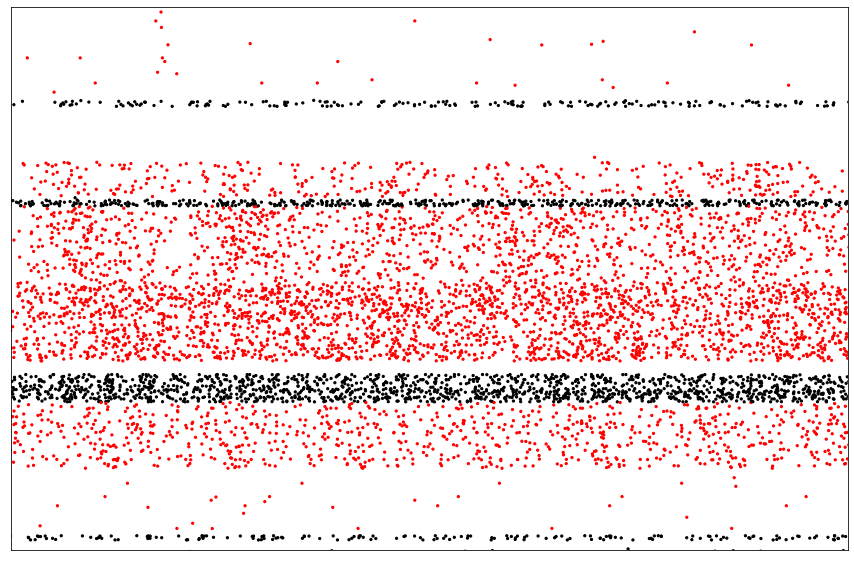

In [34]:
plt.figure(figsize=(15,10))
plt.ylim(0, 10073)
plt.gca().invert_yaxis()
ax = plt.gca()

xmin = 2000
xmax = 2250
plt.xlim(xmin, xmax)

ann_font_size = 50

#plt.annotate(' IT2/3', xy=(xmax, 1000), color = 'red', fontsize=ann_font_size) 
#plt.annotate(' IT4', xy=(xmax, 2500), color = 'red', fontsize=ann_font_size) 
#plt.annotate(' IT5A', xy=(xmax, 3200), color = 'red', fontsize=ann_font_size) 
#plt.annotate(' IT5B', xy=(xmax, 4500), color = 'red', fontsize=ann_font_size) 
#plt.annotate(' PT5B', xy=(xmax, 5800), color = 'red', fontsize=ann_font_size)
#plt.annotate(' IT6', xy=(xmax, 7800), color = 'red', fontsize=ann_font_size) 
#plt.annotate(' CT6', xy=(xmax, 9300), color = 'red', fontsize=ann_font_size)

#plt.annotate(' PV2', xy=(xmax, 2000), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' SOM2', xy=(xmax, 1800), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' PV5A', xy=(xmax, 3600), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' SOM5A', xy=(xmax, 3525), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' PV5B', xy=(xmax, 7000), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' SOM5B', xy=(xmax, 6600), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' PV6', xy=(xmax, 10000), color = 'black', fontsize=ann_font_size) 
#plt.annotate(' SOM6', xy=(xmax, 9800), color = 'black', fontsize=ann_font_size) 

#plt.title('Control Quiet Wakefulness', fontsize= 98)
#plt.xlabel('Time', fontsize=52)
#plt.ylabel('Neuron', fontsize=52)

ax.tick_params(axis='both', which='major', labelsize=48)
plt.xticks([])
plt.yticks([])

ax.scatter(spikes.time, spikes.id, color=spikes.color, s=5)
#plt.savefig("control_rest_raster.png")


In [35]:
histogram_count = time_histogram(block.filter({'neuron_pop': 'PT5B'}), 2*pq.ms, t_start=2000*pq.ms, t_stop=2250*pq.ms, output='counts')
#histogram_count = time_histogram(block.groups[7].spiketrains, 2*pq.ms, t_start=2000*pq.ms, t_stop=2250*pq.ms, output='counts')


([], [])

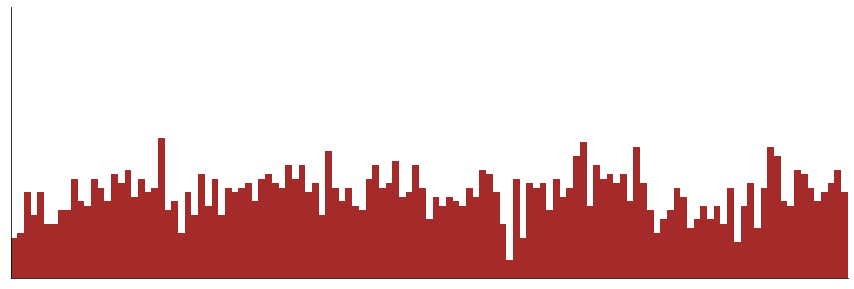

In [41]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=24)
#plt.axhline(38, linestyle='-', color='gray') # horizontal
plt.xlim(2000, 2250)
plt.ylim(0, 60)
#plt.ylabel('PT5B Spikes', fontsize=34)
plt.bar(histogram_count.times, histogram_count.magnitude.flatten(), width=histogram_count.sampling_period, align='edge', alpha=1.0, label='time histogram (count)', color='brown')
plt.xticks([])
plt.yticks([])
#plt.savefig("control_rest_PT5B_hist.svg")


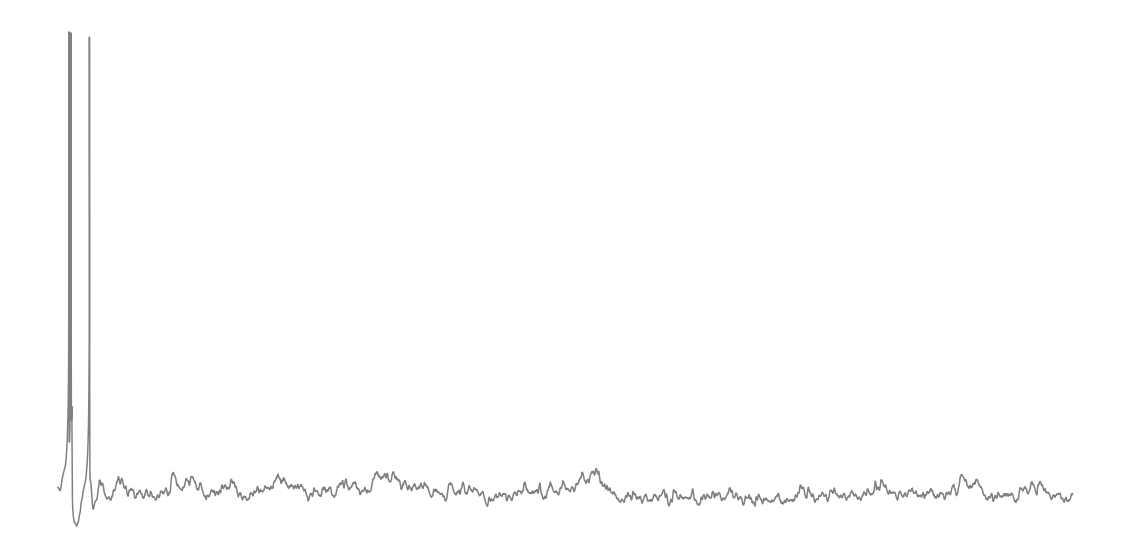

In [37]:
plt.figure(figsize=(20,10))
ax = plt.gca()
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
#plt.xlim(0, 29000)
#plt.ylim(-90, 90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.plot(data['simData']['V_soma']['cell_5131'], color='gray')
#plt.plot(data_2[f'{current}']['simData']['V_soma']['cell_0'], color='purple')


Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4731 ticks ([-8600.0, ..., 180600.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting 

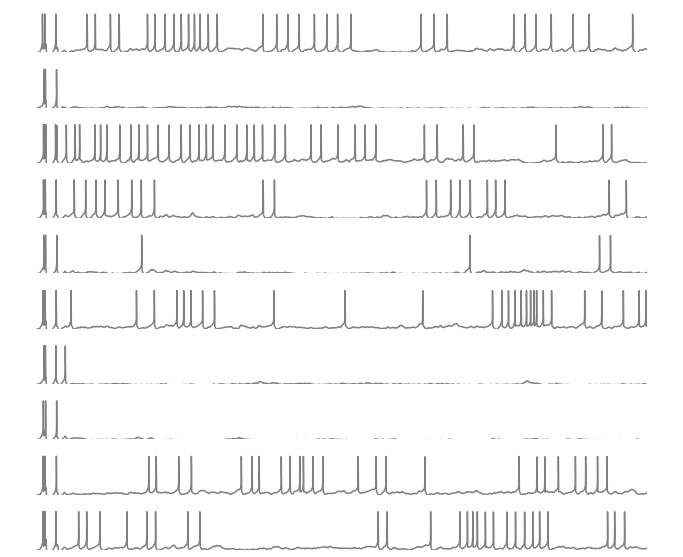

In [38]:
number_of_traces = 10

def numfmt(x, pos): # custom formatter function: divide by 60,000ms (1 minute)
    s = '{}'.format(int(x / block.groups[7].analogsignals[0].sampling_rate.base))
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting
from matplotlib.ticker import (MultipleLocator)
xfmt = tkr.FuncFormatter(numfmt)    # create your custom formatter function

#fig, ax = plt.subplots(len(blk.segments), figsize=(12,10))
fig, ax = plt.subplots(number_of_traces, figsize=(12,10))

xmin = 0
xmax = 100000
#fig.suptitle(f'Segment {segment}', fontsize=28)

#ax[0].set_ylabel(f'{bl.segments[0].analogsignals[0].units}', fontsize=20)

for i in range(number_of_traces):
#for i in range(len(blk.segments)):
#    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(-70, 50)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].xaxis.set_major_formatter(xfmt)
    ax[i].xaxis.set_major_locator(MultipleLocator(block.groups[7].analogsignals[0].sampling_rate.base))
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
        
#    ax[i].plot(blk.segments[len(blk.segments)-1-i].analogsignals[0].data.tolist(), color='gray', label='Seg 0')
    ax[i].plot(block.groups[7].analogsignals[i].data.tolist(), color='gray', label='Seg 0')
